<a href="https://colab.research.google.com/github/dswh/lil_nlp_with_tensorflow/blob/main/04_03_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poetry generation challenge

This notebook serves as a challenge on how to create poetry like Shakespeare by leveraging RNNs(LSTMs). We'll be using the Shakerpeare poetry as the training data and then use the trained network to predict the next words.

In [1]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.14.0


## Step 1: Create a corpus

In [2]:
# ##download data from this url
# !wget --no-check-certificate \
#     https://raw.githubusercontent.com/dswh/lil_nlp_with_tensorflow/main/sonnets.txt \
#     -O /tmp/sonnet.txt

In [3]:
##printing the text
shakespeare_text = open('sonnets.txt').read()
print(len(shakespeare_text))

28893


In [4]:
##create corpus by lowering the letters and splitting the text by \n
corpus = shakespeare_text.lower().split("\n")
corpus = [i for i in corpus if i]
corpus[:4]

['i',
 ' from fairest creatures we desire increase,',
 " that thereby beauty's rose might never die,",
 ' but as the riper should by time decease,']

## Set up the tokenizer

In [5]:
##set up tokenizer
tokenizer = Tokenizer()

In [6]:
tokenizer.fit_on_texts(corpus)

##calculate vocabulary size - be mindful of the <oov> token
vocab_size = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(vocab_size)

{'and': 1, 'the': 2, 'to': 3, 'thou': 4, 'in': 5, 'my': 6, 'of': 7, 'i': 8, 'thy': 9, 'that': 10, 'with': 11, 'thee': 12, 'for': 13, 'but': 14, 'not': 15, 'a': 16, 'love': 17, 'be': 18, 'all': 19, 'me': 20, 'when': 21, 'so': 22, 'by': 23, 'then': 24, 'is': 25, 'which': 26, 'as': 27, 'this': 28, 'from': 29, 'his': 30, 'self': 31, 'do': 32, 'thine': 33, 'it': 34, 'on': 35, 'art': 36, 'if': 37, 'eyes': 38, 'more': 39, 'or': 40, 'beauty': 41, 'mine': 42, 'doth': 43, 'you': 44, 'your': 45, 'time': 46, 'sweet': 47, 'make': 48, 'one': 49, 'where': 50, 'their': 51, 'fair': 52, 'her': 53, 'are': 54, 'yet': 55, 'day': 56, 'what': 57, 'see': 58, 'who': 59, 'than': 60, 'can': 61, 'should': 62, 'own': 63, 'shall': 64, 'how': 65, 'no': 66, 'hath': 67, 'will': 68, 'were': 69, 'live': 70, 'those': 71, 'him': 72, 'let': 73, 'may': 74, 'o': 75, 'night': 76, "love's": 77, 'now': 78, 'world': 79, 'she': 80, 'nor': 81, 'they': 82, "beauty's": 83, 'dost': 84, 'he': 85, 'give': 86, 'eye': 87, 'still': 88, 's

In [7]:
##create sequences of 
input_sequences = []
for line in corpus:
    tokens = tokenizer.texts_to_sequences([line])[0]
    for i in range(2, len(tokens)+1):
        n_gram_sequence = tokens[:i]
        input_sequences.append(n_gram_sequence)


In [8]:
##pad sequences
max_seq_len = max([len(i) for i in input_sequences])
input_seq_array = np.array(pad_sequences(input_sequences,
                                         maxlen=max_seq_len,
                                         padding='pre')
                        )


In [9]:
##creating features(X) and label(y)
X = input_seq_array[:, :-1]
labels = input_seq_array[:, -1]

##one-hot encode the labels to get y - since it is actually just a classification problem
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

## Define the LSTM model

In [10]:
model = tf.keras.Sequential([
                tf.keras.layers.Embedding(vocab_size, 120, input_length=max_seq_len-1),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
                tf.keras.layers.Dense(70, activation='relu'),
                tf.keras.layers.Dense(vocab_size, activation='softmax')
])

##define the learning rate - step size for optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
142/142 [==============================] - 7s 15ms/step - loss: 6.8102 - accuracy: 0.0192
Epoch 2/200
142/142 [==============================] - 2s 14ms/step - loss: 6.3143 - accuracy: 0.0250
Epoch 3/200
142/142 [==============================] - 2s 15ms/step - loss: 6.1802 - accuracy: 0.0245
Epoch 4/200
142/142 [==============================] - 2s 15ms/step - loss: 6.0250 - accuracy: 0.0270
Epoch 5/200
142/142 [==============================] - 2s 15ms/step - loss: 5.8764 - accuracy: 0.0300
Epoch 6/200
142/142 [==============================] - 2s 15ms/step - loss: 5.7211 - accuracy: 0.0378
Epoch 7/200
142/142 [==============================] - 2s 15ms/step - loss: 5.5796 - accuracy: 0.0384
Epoch 8/200
142/142 [==============================] - 2s 16ms/step - loss: 5.4547 - accuracy: 0.0407
Epoch 9/200
142/142 [==============================] - 2s 15ms/step - loss: 5.3387 - accuracy: 0.0510
Epoch 10/200
142/142 [==============================] - 2s 15ms/step - loss: 5.219

## Visualise the metrics

In [11]:
import matplotlib.pyplot as plt

def plot_metric(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

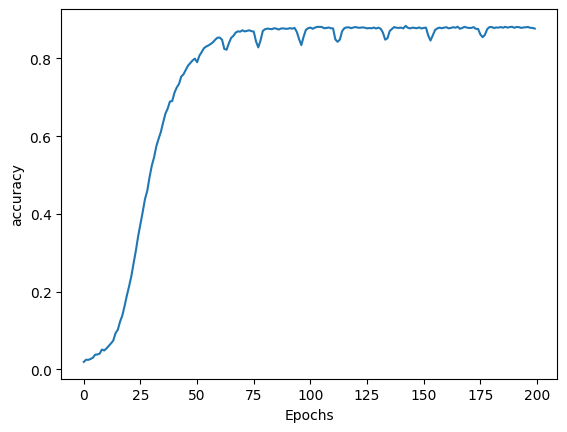

In [12]:
plot_metric(history, 'accuracy')

## Generate new text

In [13]:
seed_text = "It was a cold night."
next_words = 100

index_to_word = dict([(val,key) for (key,val) in tokenizer.word_index.items()])
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])
	token_list = pad_sequences(token_list, maxlen=max_seq_len-1, padding='pre', truncating='pre')
	predicted = model.predict(token_list, verbose=0)
	predicted = np.argmax(predicted,axis=-1)[0]
	output_word = index_to_word.get(predicted,'')
	seed_text += " " + output_word
print(seed_text)

It was a cold night. height another mind held rage ' poet's poet's rage rage fair fair fair cold gone makeless makeless makeless another old too cruel love' tomb done kings done them love poet's fair forth repair with the date ' amazeth widow's salve rage rage rage poet's rage fair women's son worms their son her worth makeless with too mind staineth rage ' too cries poet's part poet's love brow fair brow makeless makeless makeless makeless pilgrimage love love slain slain slain slain slain slain therein tongue self self gladly done done done tongue date amazeth part held none fair brow speak speak
